# ANÁLISE LOTOFÁCIL  (CONCURSOS E GANHADORES)

 - Quantidade de concursos por ano e mês
 - Quantidade de ganhadores por ano e mês  
 - Análise de série temporal  
 

**Observação:** `Será necessário alterando para o diretório raíz do projeto para poder fazer imports locais`

In [38]:
%cd ..

c:\Users\Vedovi\lotofacil


### Importações

In [39]:
# Ignorar avisos do Arima
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning  
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', ValueWarning)

# Importa a função para gerar a base de dados
from processamento.indice_resultado import dados_indice

# Importando pacote para análise de série temporal
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA  # novo caminho
from pmdarima.arima import auto_arima

# Criar gráfico
import plotly.graph_objs as go

# Para mostrar o gráfico no notebook 
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Criar gráfico
import matplotlib.pyplot as plt
%matplotlib inline

# Para formatar datas
from datetime import datetime

### Funções

In [40]:

def grafico_linha_plt(x, y, title, xlabel, ylabel):
    """
    Função para criar um gráfico de linhas utilizando o Matplotlib.
    
    Parâmetros:
    x      -> Valores do eixo (x)
    y      -> Valores do eixo (y)
    title  -> Título do gráfico
    xlabel -> Rótulo do eixo (x)
    ylabel -> Rótulo do eixo (y)
    
    """
    
    # Define as dimenssões do gráfico
    plt.figure(figsize=(15, 5))
    
    # Define o título, rótulo x, rótulo y
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Cria o gráfico
    plt.plot(x, y, color='purple', marker='o', linestyle='dashed', linewidth=1.5, markersize=4)
    # Formata a linha de grade do gráfico
    plt.grid(linestyle='--', which='major', color='grey', alpha=.25)
    # Visualiza o gráfico
    plt.show()
    
    
def grafico_linha_go(x, y, title, xlabel, ylabel):
    """
    Função para criar um gráfico de linhas utilizando o Plotly.
    
    Parâmetros:
    x      -> Valores do eixo (x)
    y      -> Valores do eixo (y)
    title  -> Título do gráfico
    xlabel -> Rótulo do eixo (x)
    ylabel -> Rótulo do eixo (y)
    
    """
    
    # Criando o gráfico
    trace = go.Scatter(x=x, y=y, mode='markers+lines')

    # Armazenando gráfico em uma lista
    grafico = [trace]

    # Criando Layout
    layout = go.Layout(title=title, xaxis={'title': xlabel}, yaxis={'title': ylabel})

    # Criando figura que será exibida
    fig = go.Figure(data=grafico, layout=layout)

    # Visualiza o gráfico
    py.iplot(fig)

### Definição e análise dos dados

In [41]:
# Criando a base de dados
base = dados_indice()

In [42]:
# Mostra as informações da base de dados
base.info()

<class 'pandas.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Concurso      3603 non-null   int64  
 1   Indice        3603 non-null   int64  
 2   Data Sorteio  3603 non-null   str    
 3   Ganhou        0 non-null      float64
 4   Dia           3603 non-null   str    
 5   Mes           3603 non-null   str    
 6   Ano           3603 non-null   str    
dtypes: float64(1), int64(2), str(4)
memory usage: 197.2 KB


In [43]:
# Converte para o tipo data
base['Data Sorteio'] = base['Data Sorteio'].apply(lambda _: datetime.strptime(_, '%d/%m/%Y'))

In [44]:
# Visualizando os tipos dos dados
base.dtypes

Concurso                 int64
Indice                   int64
Data Sorteio    datetime64[us]
Ganhou                 float64
Dia                        str
Mes                        str
Ano                        str
dtype: object

In [45]:
# Visualiza as 5 primeiras linhas
base.head()

,Concurso,Indice,Data Sorteio,Ganhou,Dia,Mes,Ano
0,1,2320459,2003-09-29,NaN,29,09,2003
1,2,1672791,2003-10-06,NaN,06,10,2003
2,3,1768501,2003-10-13,NaN,13,10,2003
3,4,797916,2003-10-20,NaN,20,10,2003
4,5,927593,2003-10-27,NaN,27,10,2003


In [46]:
# Quantidade de concursos por ano
concursos_ano = base.groupby('Ano')['Concurso'].count()
concursos_ano

Ano
2003     14
2004     52
2005     52
2006     63
2007    104
2008    103
2009    104
2010    104
2011    104
2012    149
2013    151
2014    152
2015    152
2016    151
2017    150
2018    152
2019    153
2020    211
2021    290
2022    292
2023    289
2024    290
2025    293
2026     28
Name: Concurso, dtype: int64

In [47]:
# Quantidade de ganhadores por ano
ganhadores = base.groupby('Ano')['Ganhou'].sum()
ganhadores

Ano
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
2022    0.0
2023    0.0
2024    0.0
2025    0.0
2026    0.0
Name: Ganhou, dtype: float64

In [48]:
# Definindo os dados para analisar a quantidade de concursos por ano
x_concursos = []
y_concursos = []

for k, v in dict(concursos_ano).items():
    x_concursos.append(k)
    y_concursos.append(v)

In [49]:
# Definindo os dados para analisar a quantidade de ganhadores por ano
x_ganhadores = []
y_ganhadores = []

for k, v in dict(ganhadores).items():
    x_ganhadores.append(k)
    y_ganhadores.append(v)

**Análise com o Plotly**

In [50]:
grafico_linha_go(x_ganhadores, y_ganhadores, 'Ganhadores x Ano', 'Ano', 'Quantidade de Ganhadores')

In [51]:
grafico_linha_go(x_concursos, y_concursos, 'Concursos x Ano', 'Ano', 'Quantidade de Concursos')

**Análise com o Matplotlib**

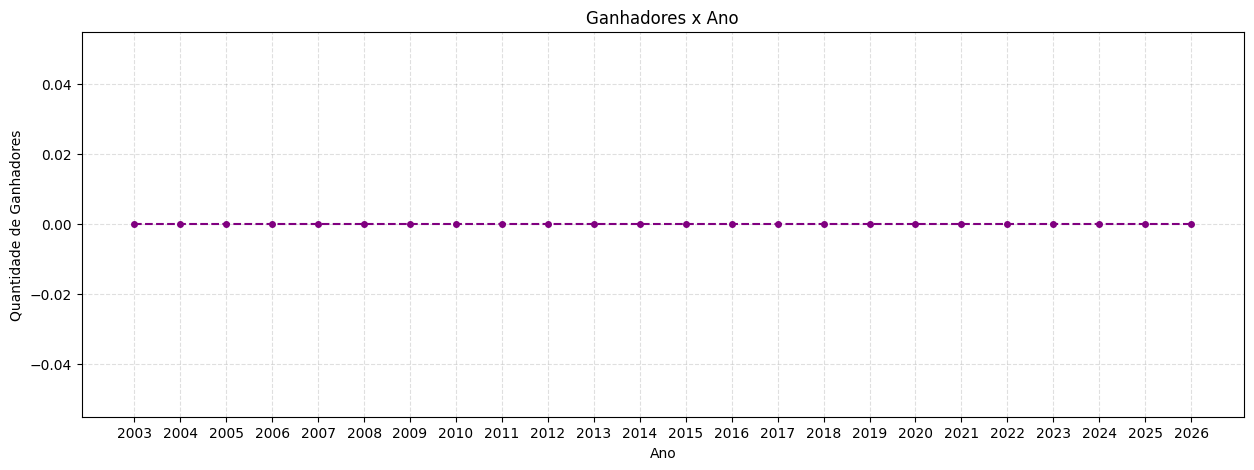

In [52]:
grafico_linha_plt(x_ganhadores, y_ganhadores, 'Ganhadores x Ano', 'Ano', 'Quantidade de Ganhadores')

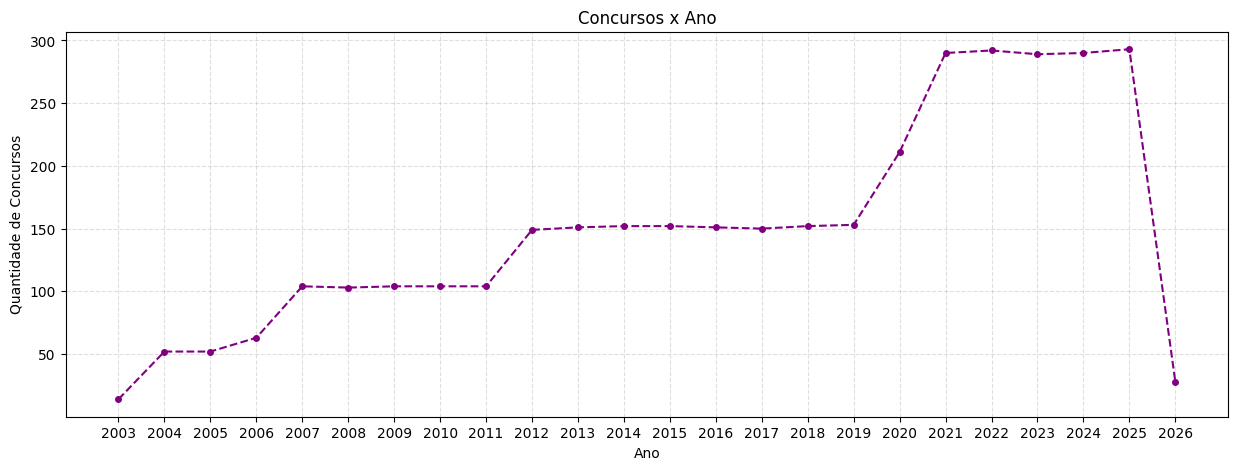

In [53]:
grafico_linha_plt(x_concursos, y_concursos, 'Concursos x Ano', 'Ano', 'Quantidade de Concursos')

In [54]:
# Definindo últimos anos
ano = str(base['Ano'].astype('int64').max() - 4)

In [55]:
# Quantidade de concursos por mês nos últimos 5 anos
base.groupby(['Ano', 'Mes'])['Concurso'].count()[ano:]

Ano   Mes
2022  01     25
      02     23
      03     26
      04     24
      05     26
      06     25
      07     26
      08     23
      09     18
      10     25
      11     24
      12     27
2023  01     25
      02     22
      03     27
      04     23
      05     26
      06     25
      07     26
      08     22
      09     19
      10     25
      11     24
      12     25
2024  01     26
      02     23
      03     25
      04     26
      05     25
      06     25
      07     27
      08     20
      09     19
      10     26
      11     23
      12     25
2025  01     26
      02     24
      03     24
      04     24
      05     26
      06     24
      07     27
      08     22
      09     21
      10     27
      11     23
      12     25
2026  01     27
      02      1
Name: Concurso, dtype: int64

In [56]:
# Quantidade de ganhadores por mês nos últimos 5 anos
base.groupby(['Ano', 'Mes'])['Ganhou'].sum()[ano:]

Ano   Mes
2022  01     0.0
      02     0.0
      03     0.0
      04     0.0
      05     0.0
      06     0.0
      07     0.0
      08     0.0
      09     0.0
      10     0.0
      11     0.0
      12     0.0
2023  01     0.0
      02     0.0
      03     0.0
      04     0.0
      05     0.0
      06     0.0
      07     0.0
      08     0.0
      09     0.0
      10     0.0
      11     0.0
      12     0.0
2024  01     0.0
      02     0.0
      03     0.0
      04     0.0
      05     0.0
      06     0.0
      07     0.0
      08     0.0
      09     0.0
      10     0.0
      11     0.0
      12     0.0
2025  01     0.0
      02     0.0
      03     0.0
      04     0.0
      05     0.0
      06     0.0
      07     0.0
      08     0.0
      09     0.0
      10     0.0
      11     0.0
      12     0.0
2026  01     0.0
      02     0.0
Name: Ganhou, dtype: float64

In [57]:
# Quantidade média de ganhadores por concurso em cada mês nos últimos 5 anos
base.groupby(['Ano', 'Mes'])['Ganhou'].mean()[ano:].round()

Ano   Mes
2022  01    NaN
      02    NaN
      03    NaN
      04    NaN
      05    NaN
      06    NaN
      07    NaN
      08    NaN
      09    NaN
      10    NaN
      11    NaN
      12    NaN
2023  01    NaN
      02    NaN
      03    NaN
      04    NaN
      05    NaN
      06    NaN
      07    NaN
      08    NaN
      09    NaN
      10    NaN
      11    NaN
      12    NaN
2024  01    NaN
      02    NaN
      03    NaN
      04    NaN
      05    NaN
      06    NaN
      07    NaN
      08    NaN
      09    NaN
      10    NaN
      11    NaN
      12    NaN
2025  01    NaN
      02    NaN
      03    NaN
      04    NaN
      05    NaN
      06    NaN
      07    NaN
      08    NaN
      09    NaN
      10    NaN
      11    NaN
      12    NaN
2026  01    NaN
      02    NaN
Name: Ganhou, dtype: float64

_A partir de 2012, a quantidade de concurso começou a manter um padrão linear. Com base neste fato, iremos análisar o intervalo de tempo a partir deste ano._

In [58]:
# Perído de análise
ano_inicio = '2012'

In [59]:
# Dados análise
analise = base[base['Ano'] >= ano_inicio]

In [60]:
# Obtém os indices dos concursos que possuem e não possuem vencedores de acordo com o período estipulado
indice_c = base[(base['Ganhou'] > 0) & (base['Ano'] >= ano_inicio)]
indice_s = base[(base['Ganhou'] == 0) & (base['Ano'] >= ano_inicio)]

In [61]:
# Quantidade de concursos com e sem vencedores
s_vencedor = len(indice_s)
c_vencedor = len(indice_c)

In [62]:
# Quantidade
print(f'Qtde concurso sem vencedores: {s_vencedor} \nQtde concurso com vencedores: {c_vencedor}\nTotal: {len(analise)}')

Qtde concurso sem vencedores: 0 
Qtde concurso com vencedores: 0
Total: 2903


## ANÁLISE DE SÉRIE TEMPORAL

In [63]:
# Reajustando os dados
ts = analise.query('Ano <= "2020"')
ts.reset_index(drop=True, inplace=True)

In [64]:
# Reajustando o campo de data
for indice, valor in ts['Data Sorteio'].items():
    ts.loc[indice, 'Data Sorteio'] = datetime.strptime(valor.strftime('%Y-%m'), '%Y-%m')

In [65]:
# Agregando os dados
ts = ts.groupby('Data Sorteio')['Ganhou'].sum()

In [66]:
# Quantidade de meses no perído que será avaliado
len(ts)

108

**Será avaliado no período:**

1 - _Tendência_  
2 - _sazionalidade_  
3 - _Variação_

In [67]:
grafico_linha_go(ts.index, ts.values, 'Ganhadores x Período', 'Período', 'Ganhadores');

In [68]:
# Decomposição da série temporal
decomposicao = seasonal_decompose(ts)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

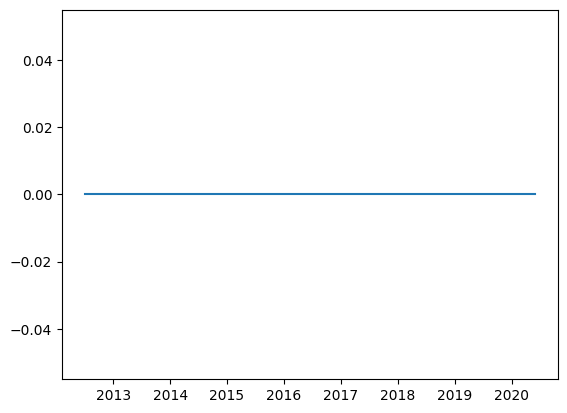

In [69]:
# Analisa a tendência
plt.plot(tendencia);

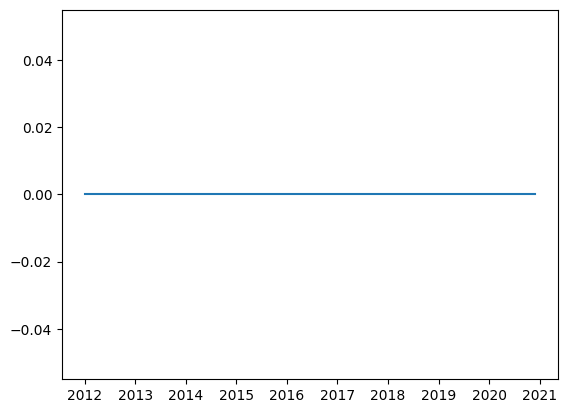

In [70]:
# Analisa a sazionalidade
plt.plot(sazonal);

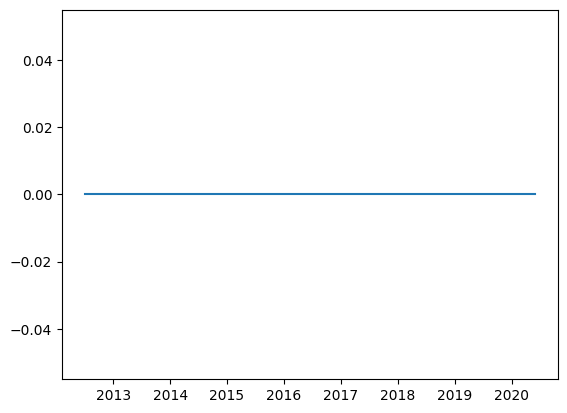

In [71]:
# Analisa as variações no período
plt.plot(aleatorio);

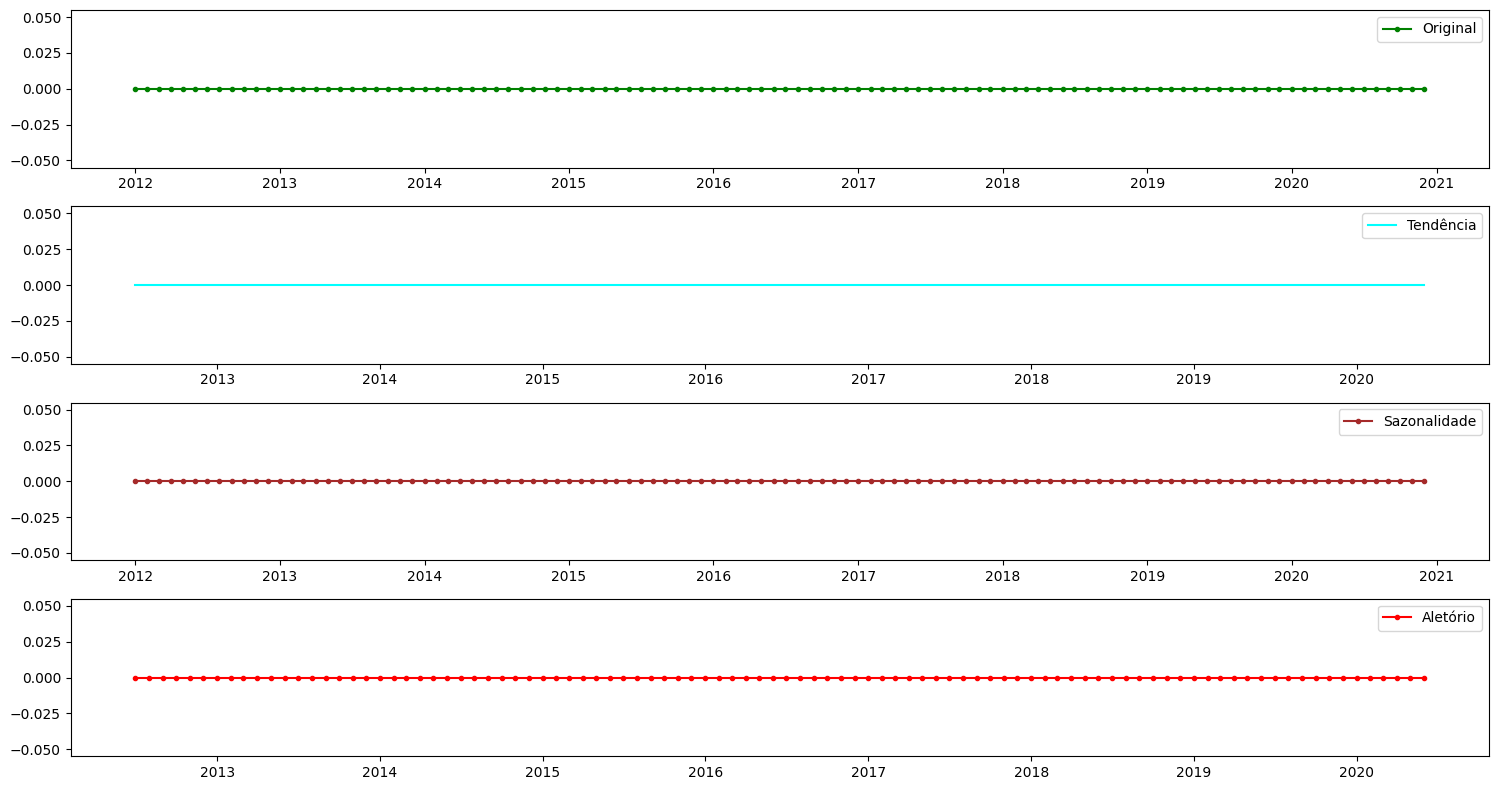

In [72]:
# Agrupado
plt.figure(figsize=(15, 8))

plt.subplot(4,1,1)
plt.plot(ts, label = 'Original', color='green', marker='o', linestyle='solid', linewidth=1.5, markersize=3)
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência', color='cyan', marker='None', linestyle='solid', linewidth=1.5, markersize=3)
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade', color='brown', marker='o', linestyle='solid', linewidth=1.5, markersize=3)
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aletório', color='red', marker='o', linestyle='solid', linewidth=1.5, markersize=3)
plt.legend(loc = 'best')
plt.tight_layout()

**PREVISÃO DE GANHADORES PARA OS PRÓXIMOS CONCURSOS**  

In [73]:
# Obtendo os parâmetros de ajuste do modelo
param = auto_arima(ts, m=12, seasonal=True, trace=False, suppress_warnings=True)
param.summary()

c:\Users\Vedovi\lotofacil\lotofacil\.venv\Lib\site-packages\pmdarima\arima\auto.py:444: UserWarning:

Input time-series is completely constant; returning a (0, 0, 0) ARMA.

c:\Users\Vedovi\lotofacil\lotofacil\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1431: RuntimeWarning:

invalid value encountered in divide

c:\Users\Vedovi\lotofacil\lotofacil\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:702: RuntimeWarning:

invalid value encountered in divide



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:                        SARIMAX   Log Likelihood                1144.151
Date:                Fri, 06 Feb 2026   AIC                          -2286.301
Time:                        15:25:21   BIC                          -2283.619
Sample:                    01-01-2012   HQIC                         -2285.214
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10   1.91e-10      0.524      0.600   -2.74e-10    4.74e-10
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
# Criação e visualização das informações do modelo
modelo = ARIMA(ts, order=(0, 1, 1)).fit()
treino_modelo = modelo.fit()
treino_modelo.summary()

AttributeError: 'ARIMAResults' object has no attribute 'fit'

In [ ]:
# Previsões para os próximos meses (steps = quantidade de meses)
previsao = treino_modelo.forecast(steps=12)[0]

In [ ]:
previsao

In [ ]:
# Série original
plt.figure(figsize=(15, 4))
serie_original = ts.plot()

In [ ]:
# Plotando as previsões
treino_modelo.plot_predict('2020-06-01', '2021-01-01', ax=serie_original, plot_insample=True)